### Introduction: Point to Polygon Intersection and Plot

In [1]:
import pandas as pd
from maply.geometry import Point, Polygon
from maply.plot import Map

Points to Geodataframe

In [2]:
lst_of_points = [
    Point((2, 2), data={"name": "point1"}),
    Point((3, 4), data={"name": "point2"}),
    Point((4, 4), data={"name": "point3"}),
    Point((5, 2), data={"name": "point4"}),
    Point((4, 1), data={"name": "point5"})
]

point_gdf = pd.concat([point.to_gdf() for point in lst_of_points], ignore_index=True)
point_gdf

,name,geometry
0,point1,POINT (2 2)
1,point2,POINT (3 4)
2,point3,POINT (4 4)
3,point4,POINT (5 2)
4,point5,POINT (4 1)


Polygons to Geodataframe

In [13]:
lst_of_polygons = [
    Polygon(origin=(1,1), size=(1, 1), data={"name": "polygon1"}),
    Polygon(origin=(3,4), size=(1, 1), data={"name": "polygon2"}),
    Polygon(origin=(4,4), size=(1, 1), data={"name": "polygon3"}),
    Polygon(origin=(5,2), size=(1, 1), data={"name": "polygon4"}),
]

polygon_gdf = pd.concat([polygon.to_gdf() for polygon in lst_of_polygons], ignore_index=True)
polygon_gdf

,name,geometry
0,polygon1,"POLYGON ((1 1, 2 1, 2 2, 1 2, 1 1))"
1,polygon2,"POLYGON ((3 4, 4 4, 4 5, 3 5, 3 4))"
2,polygon3,"POLYGON ((4 4, 5 4, 5 5, 4 5, 4 4))"
3,polygon4,"POLYGON ((5 2, 6 2, 6 3, 5 3, 5 2))"


Spatially Join Point to Polygons

In [4]:
p_poly_sjoin = point_gdf.sjoin(polygon_gdf, how="inner", predicate="intersects")
p_poly_sjoin

,name_left,geometry,index_right,name_right
0,point1,POINT (2 2),0,polygon1
2,point3,POINT (4 4),1,polygon2


In [5]:
# add a new column for labeling the points
p_poly_sjoin["label"] = p_poly_sjoin["name_left"] + " inside: " + p_poly_sjoin["name_right"]

In [6]:
# drop points that joined from original points geodataframe
point_gdf = point_gdf[~point_gdf.index.isin(p_poly_sjoin.index)]

Create a map and Plot all shapes while labeling our Points

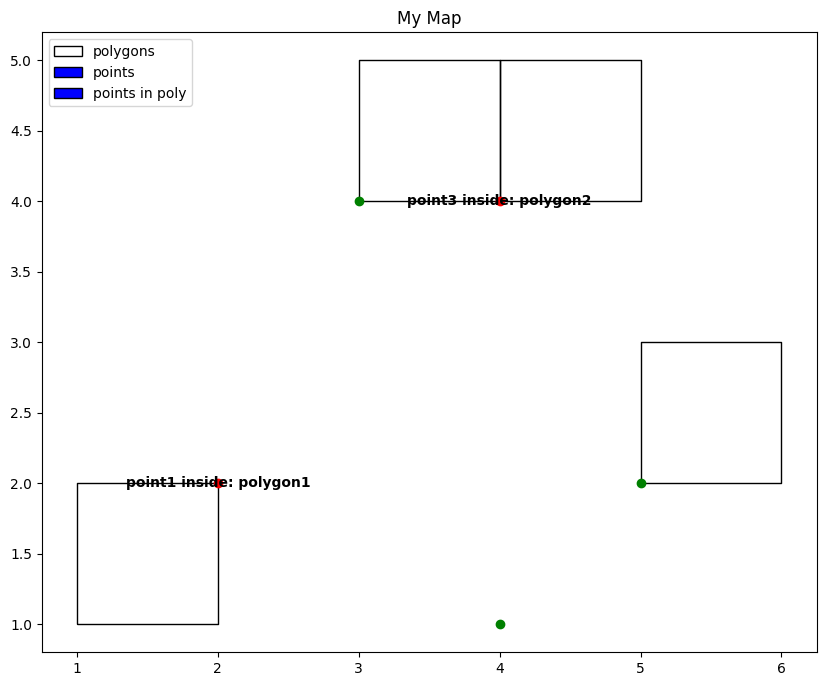

In [15]:
m = Map()

# POLYGONS
m.add_gdf(
    gdf=polygon_gdf,
    layer='polygons',
    # transparent with black edge
    style={'facecolor':'none', 'edgecolor':'black'}
)

# POINTS 
m.add_gdf(
    gdf=point_gdf,
    layer='points',
    # green points
    style={'color':'green'}
)

# SPATIAL JOINED POINTS
m.add_gdf(
    gdf=p_poly_sjoin,
    layer='points in poly',
    # red points
    style={'color': 'red'},
    label='label',  #column to label
    label_kwargs={'fontsize':10, 'color':'red'}
)

m.plot()

In [27]:
m.layers['points']['shapes'][0]['data'].geometry


1    POINT (3 4)
3    POINT (5 2)
4    POINT (4 1)
Name: geometry, dtype: geometry